# Week 09 Homework, Matt Briskey

### 1. Explain how does the k-means algorithm works.

K-means algorithm is a clustering technique that allows us to find groups of similar objects, objects
that are more related to each other than to objects in other groups.  The general steps are listed below:
1. The user selects the numbers of clusters
2. The centroids are randomly selected
3. The points are assigned to their nearest cluster using the squared Euclidian distance 
4. The centroid is moved to the center of the cluster
5. Repeat steps 2-4 from above a given number of times or until the points no longer change clusters

### 2. Based on the given data set (https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv), apply k-mean clustering, identify the number of clusters using the elbow method, present the results by scatter plot.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/customers.csv')

df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [2]:
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

In [3]:
df.head()

,CustomerID,Annual Income,Spending Score
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


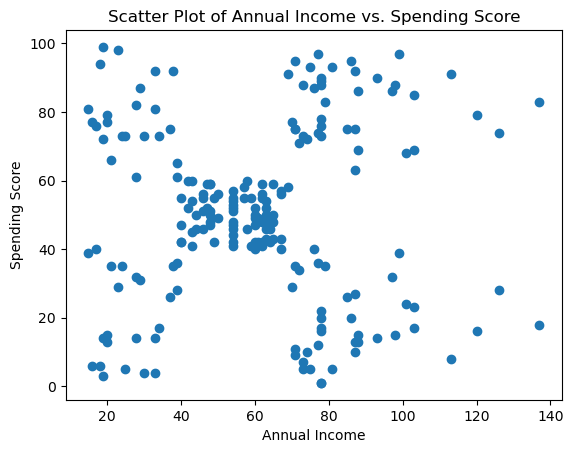

In [4]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(df['Annual Income'], df['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()


In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4,
            init='random',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df)

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess the data
# Fill any missing values if necessary
df = df.fillna(0)

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply k-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataset
df["Cluster"] = labels

# Print the cluster assignments
print(df["Cluster"].value_counts())

0    75
3    62
2    40
1    23
Name: Cluster, dtype: int64


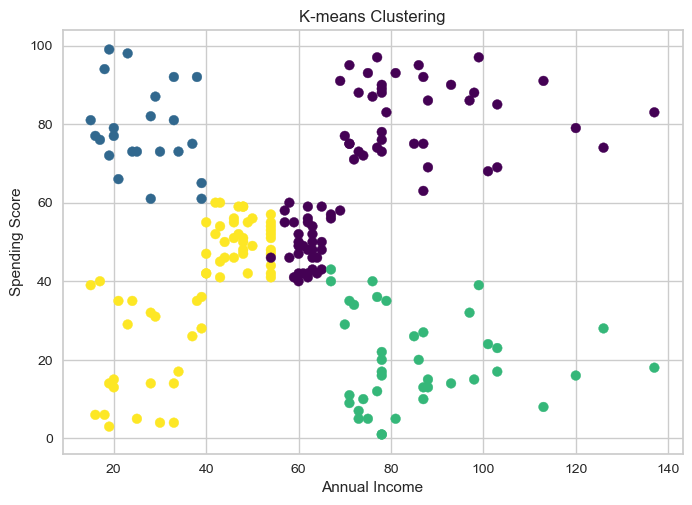

In [25]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.scatter(df['Annual Income'], df['Spending Score'], c=labels, cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.show()

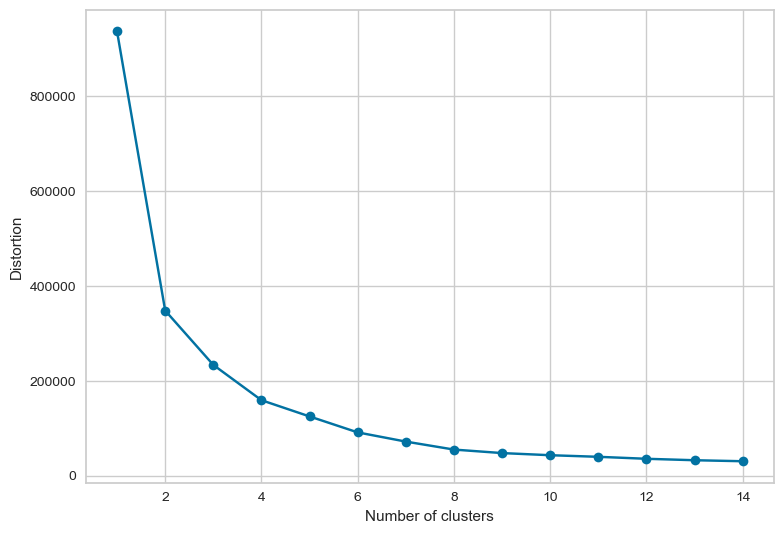

In [26]:
# Identify the number of clusters using the elbow method

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(df)
    distortions.append(km.inertia_)


# Plot results
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 3. Apply silhouette analysis on the above k-mean clustering.

In [21]:
!pip install yellowbrick

     ------------------------------------ 282.6/282.6 kB 830.4 kB/s eta 0:00:00


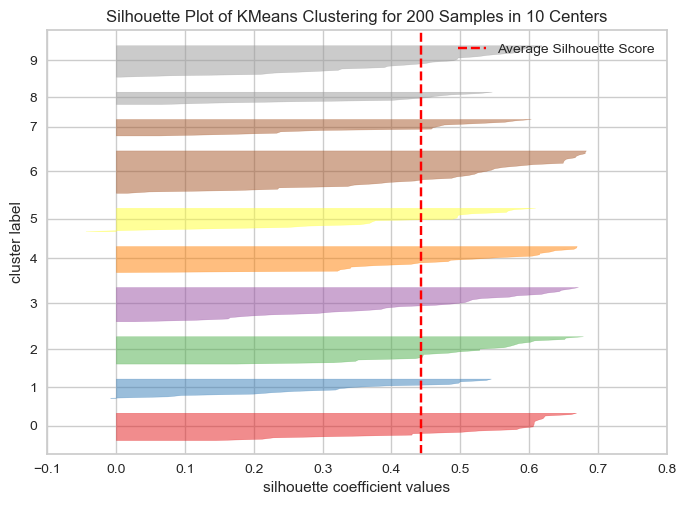

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 200 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(n_clusters=10,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)

visualizer = SilhouetteVisualizer(km)

visualizer.fit(df) # Fit the data to the visualizer
visualizer.poof() # Draw the data